# Actividad Test de Bondad de Ajuste

En esta actividad vamos a realizar un test de bondad de ajuste para identificar si el ancho de las hojas de la clase 1 y 2 son **independientes**.

Para eso vamos a realizar un *paso a paso* para lograr plantear un **test de bondad de ajuste** para decidir si hay evidencia para rechazar esta afirmaci'on.

# Actividad Test de Bondad de Ajuste

En esta actividad vamos a realizar un test de bondad de ajuste para identificar si el ancho de las hojas de la clase 1 y 2 son **independientes**.

Para eso vamos a realizar un *paso a paso* para lograr plantear un **test de bondad de ajuste** para decidir si hay evidencia para rechazar esta afirmaci'on.

In [80]:
# Librerias que pueden ser utiles

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import chi2


In [13]:
# Abrir el data set de las hojas.
hojas = pd.read_csv("dataset.csv")
hojas = hojas.dropna()

clase_1 = hojas[hojas["clase"] == 1.0]
clase_2 = hojas[hojas["clase"] == 2.0]


ancho1= list(clase_1["ancho"])
ancho2=list(clase_2["ancho"][:len(ancho1)])





## Actividad 1

a) Hacer los histogramas $h_X$ y $h_Y$ para
- $X$ = "ancho de la C1"
- $Y$ = "ancho de la C2"

b) Guardar los valores $N$ y $M$, donde $N$ es la cantidad de bins del histograma de $X$ y $M$ la cantidad de bins del histograma de $Y$.


**Nota:**
- Como sabrán, en los datos pueden contener Nans (valores "Not a Number"s), por lo que es importante que no figuren esos valores. No deberían trabajar con Nans, es algo que se encontrarán en trabajos reales.
- La clase 1 tiene $L1$ muestras y las clase 2 tiene $L2$ muestras. Pueden quedarse con $L$ muestras de cada clase, donde $L = min(L1, L2)$ para trabajar con la misma cantidad de muestras.

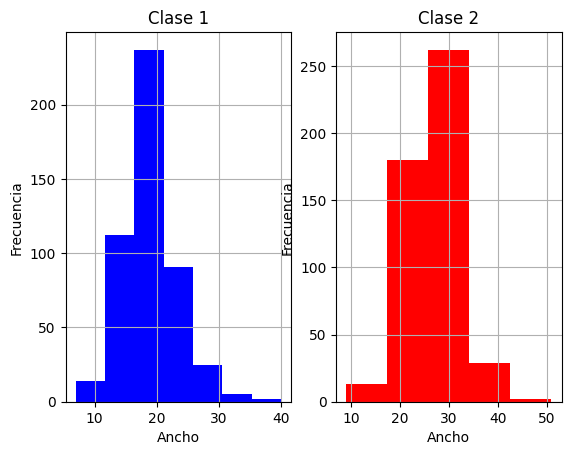

In [47]:
# Actividad 1

N = 7
M = 5

subplot = plt.subplot(1, 2, 1)
bins_a1, _, _ = plt.hist(ancho1, bins=N, color="blue")
plt.title("Clase 1")
plt.xlabel("Ancho")
plt.ylabel("Frecuencia")
plt.grid()

subplot = plt.subplot(1, 2, 2)
bins_a2, _, _ = plt.hist(ancho2, bins=M, color="red")
plt.title("Clase 2")
plt.xlabel("Ancho")
plt.ylabel("Frecuencia")
plt.grid()




# Actividad 2

Hacer el histograma conjunto $H_{XY}$ de $X$ e $Y$.

**Nota:**
- Se espera una matriz de $N$x$M$.
- Explorar la funcion **np.histogram2d**



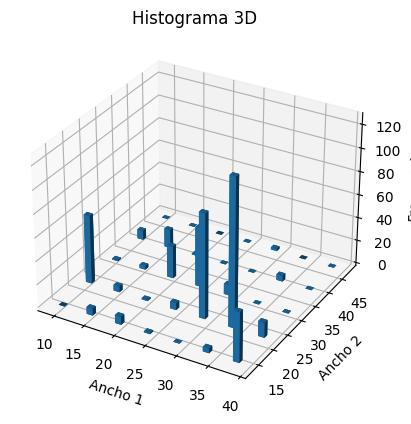

In [72]:

# Actividad 2
# Crear el histograma en 2D
observados, xedges, yedges = np.histogram2d(ancho1, ancho2, bins=[N, M])

# Preparar la figura
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Obtener las coordenadas de los centros de los bins
xpos, ypos = np.meshgrid(xedges[:-1] + 0.5 * (xedges[1] - xedges[0]),
                         yedges[:-1] + 0.5 * (yedges[1] - yedges[0]))

xpos = xpos.flatten()
ypos = ypos.flatten()
zpos = np.zeros_like(xpos)

# Altura de los bins
dz = observados.flatten()

# Visualizar el histograma en 3D
ax.bar3d(xpos, ypos, zpos, 1, 1, dz, zsort='average')

ax.set_xlabel('Ancho 1')
ax.set_ylabel('Ancho 2')
ax.set_zlabel('Frecuencia')
ax.set_title('Histograma 3D')

plt.show()




# Actividad 3

Si asumimos que $X$ e $Y$ son independientes, enonces debe suceder que el histograma conjunto de $X$ e $Y$ sea

$$H_{X \perp Y} = h_X \cdot h_Y$$

Calcular empiricamente $H_{X \perp Y}$ si asumimos $X$ e $Y$ independientes.



In [73]:
# Actividad 3

esperado = np.zeros((N, M))

for i, bin1 in enumerate(bins_a1):
    for j, bin2 in enumerate(bins_a2):
        esperado[i][j] = int(bin1 * bin2) / (len(ancho1))




## Actividad 4

Plantear EN SUS HOJAS un test de **bondad de ajuste** con *significancia* $ɛ = 0.05$ para la hipotesis
$$H = X \perp B$$

Asumiendo que $X$ e $Y$ se distribuyen de manera normal.

- ¿Cuantos grados de libertad tiene nuestro test?
- ¿Hay evidencia para decir que el ancho de la C1 **NO** es independiente del ancho de la C2?





In [90]:
from scipy.stats import chi2
# Actividad 4

#busco D
chi = chi2((N-1)*(M-1))

D = 0
D_ = chi.ppf(0.95)

for i in range(N):
    for j in range(M):
        D += (observados[i][j] - esperado[i][j])**2 / esperado[i][j]

print("D: ", D)
print("D_: ", D_)
print("H Rechazada" if D > D_ else "H Aceptada")


D:  17.964487199516903
D_:  36.41502850180731
H Aceptada


## Actividad 5

Hacer un test de bondad de ajuste con las hipotesis de la **actividad 4** asumiendo que el ancho de C1 y el ancho de C2 se distribuyen de forma normal.



In [ ]:
# Actividad 5